In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import correlated_selfveto as cs
import utils
import numpy as np
import tqdm
import scipy.integrate as integrate
from external import elbert,selfveto

rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size' : 18})
cols = ['#29A2C6','#FF6D31','#FFCB18','#73B66B','#EF597B', '#333333']

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 18}

In [6]:
units=cs.Units()
caca=cs.CorrelatedSelfVetoProbabilityCalculator(1)

InteractionYields::_load(): Looking for /Users/carguelles/Library/Python/2.7/lib/python/site-packages/data/SIBYLL23C_yields_compact_ledpm.bz2
DecayYields:_load():: Loading file /Users/carguelles/Library/Python/2.7/lib/python/site-packages/data/decays_v1_compact.ppd

Hadrons and stable particles:

"gamma", "p", "p-bar", "n-bar", "n"

Mixed:

"pi-", "pi+", "K0L", "K-", "K+", "Lambda0", "Lambda0-bar", "K0S", 
"D+", "D-", "Ds+", "Ds-", "D0", "D0-bar"

Resonances:



Leptons:

"e-", "nue", "numu", "nutau", "antinutau", "antinumu", "antinue", "e+", 
"mu-", "mu+"

Aliases:
"obs_numu", "obs_nutau", "pr_antinutau", "pr_antinumu", "pr_antinue", "obs_antinue", "k_nue", "k_numu", 
"k_nutau", "pi_antinutau", "pi_antinue", "pi_antinumu", "pi_nue", "pi_numu", "pi_nutau", "k_antinutau", 
"k_antinumu", "k_antinue", "obs_nue", "pr_nue", "pr_numu", "pr_nutau", "obs_antinutau", "obs_antinumu", 
"k_mu-", "obs_mu-", "pr_mu+", "pi_mu+", "pi_mu-", "k_mu+", "pr_mu-", "obs_mu+"

Total number of species: 61
MCEq

In [7]:
len(caca.Xvec)

1000

In [15]:
GetReachingMatrix(1.)

array([[ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  0.,  0.],
       [ 1.,  1.,  1., ...,  1.,  1.,  0.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [39]:
np.transpose(RM)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [62]:
GetReachingMatrix(1.)

/Users/carguelles/Library/Python/2.7/lib/python/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/Users/carguelles/Library/Python/2.7/lib/python/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/carguelles/Library/Python/2.7/lib/python/site-packages/scipy/integrate/quadpack.py:364: Integratio

array([[  5.00002382e-01,   1.00000000e+00,   1.00000000e+00, ...,
          5.07981087e-01,   3.43882265e-01,   1.25052873e-01],
       [  0.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
         -2.22044605e-16,  -2.22044605e-16,   0.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
         -2.22044605e-16,  -2.22044605e-16,   0.00000000e+00],
       ..., 
       [  4.92018939e-01,   1.00000000e+00,   1.00000000e+00, ...,
          5.00000000e-01,  -2.22044605e-16,   0.00000000e+00],
       [  6.56107614e-01,   1.00000000e+00,   1.00000000e+00, ...,
          1.00000000e+00,   5.00000000e-01,   0.00000000e+00],
       [  8.74957755e-01,   1.00000000e+00,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   5.00000000e-01]])

In [60]:
GetMeanMuonReachProbability(e_grid[-2],e_grid[-1],e_grid[-2],e_grid[-1],utils.overburden(1.))

0.49999999999999967

In [16]:
Units=units
e_grid=caca.mceq_run.e_grid
#xmax=0

def GetMeanMuonReachProbability(EnuMin,EnuMax,EpMin,EpMax,ice_distance):
    return integrate.dblquad(
                             lambda Ep,Enu: caca.MuonReachProbability((Ep-Enu)*units.GeV,ice_distance),
                             EnuMin,EnuMax,
                             lambda Enu: np.max([Enu,EpMin]), lambda Enu: EpMax
                             )[0]/((EpMax-EpMin)*(EnuMax-EnuMin))
                      
def GetReachingMatrix(costh):
    ice_distance=utils.overburden(costh)
    PR_matrix=np.ones((len(e_grid),len(e_grid)))
    for ipadre in range(len(e_grid)):
        for ihijo in range(len(e_grid)):
            EnuMin = e_grid[ihijo-1]
            EnuMax = e_grid[ihijo]
            EpMin = e_grid[ipadre-1]
            EpMax = e_grid[ipadre]
            
            #PR_matrix[ihijo][ipadre] = 1.-caca.MuonReachProbability((e_grid[ipadre]-e_grid[ihijo])*units.GeV,ice_distance)
            PR_matrix[ihijo][ipadre] = 1. - GetMeanMuonReachProbability(EnuMin,EnuMax,EpMin,EpMax,ice_distance)
            #if ihijo < ipadre:
            #    PR_matrix[ihijo][ipadre] = 1.-caca.MuonReachProbability((e_grid[ipadre]-e_grid[ihijo])*units.GeV,ice_distance)
            #elif ihijo > ipadre:
            #    PR_matrix[ihijo][ipadre] = 0. # unphysical guy
            #elif ihijo == ipadre:
            #    continue
            #    PR_matrix[ihijo][ipadre] = 1.-caca.MuonReachProbability((e_grid[ipadre])*units.GeV,ice_distance)
    return PR_matrix

def GetPassingFraction(costh):
    caca=cs.CorrelatedSelfVetoProbabilityCalculator(costh)
    
    PR_matrix=GetReachingMatrix(costh)
    KaonToNeutrinoYield=caca.mceq_run.ds.get_d_matrix(caca.ParticleProperties.pdg_id["kaon"],14)
    rescale_kaon_decay_matrix=np.multiply(PR_matrix,KaonToNeutrinoYield)
    PionToNeutrinoYield=caca.mceq_run.ds.get_d_matrix(caca.ParticleProperties.pdg_id["pion"],14)
    rescale_pion_decay_matrix=np.multiply(PR_matrix,PionToNeutrinoYield)
    
    passing_guy_numerator = np.zeros(len(caca.mceq_run.e_grid))
    passing_guy_denominator = np.zeros(len(caca.mceq_run.e_grid))
    
    for idx,XX in enumerate(caca.Xvec):
        if(idx >= len(caca.Xvec) -1): continue
        height = caca.mceq_run.density_model.s_lX2h(np.log(caca.Xvec[idx]))*units.cm
        deltah = (caca.mceq_run.density_model.s_lX2h(np.log(caca.Xvec[idx])) -\
                  caca.mceq_run.density_model.s_lX2h(np.log(caca.Xvec[idx+1])))*Units.cm
        #if deltah>xmax:
        #    xmax=deltah
        # do for kaon
        inv_decay_length_array = (caca.ParticleProperties.mass_dict["kaon"]/caca.mceq_run.e_grid*units.GeV)*\
                                  (deltah/caca.ParticleProperties.lifetime_dict["kaon"])
        rescale_phi=inv_decay_length_array*caca.mceq_run.get_solution("K-",0,idx)

        passing_guy_numerator+=(np.dot(rescale_kaon_decay_matrix,rescale_phi))
        passing_guy_denominator+=(np.dot(KaonToNeutrinoYield,rescale_phi))

        # do for pion
        inv_decay_length_array = (caca.ParticleProperties.mass_dict["pion"]/caca.mceq_run.e_grid*units.GeV)*\
                                 (deltah/caca.ParticleProperties.lifetime_dict["pion"])
        rescale_phi=inv_decay_length_array*caca.mceq_run.get_solution("pi-",0,idx)

        passing_guy_numerator+=(np.dot(rescale_pion_decay_matrix,rescale_phi))
        passing_guy_denominator+=(np.dot(PionToNeutrinoYield,rescale_phi))
    return passing_guy_numerator/passing_guy_denominator

InteractionYields::_load(): Looking for /Users/carguelles/Library/Python/2.7/lib/python/site-packages/data/SIBYLL23C_yields_compact_ledpm.bz2
DecayYields:_load():: Loading file /Users/carguelles/Library/Python/2.7/lib/python/site-packages/data/decays_v1_compact.ppd

Hadrons and stable particles:

"gamma", "p", "p-bar", "n-bar", "n"

Mixed:

"pi-", "pi+", "K0L", "K-", "K+", "Lambda0", "Lambda0-bar", "K0S", 
"D+", "D-", "Ds+", "Ds-", "D0", "D0-bar"

Resonances:



Leptons:

"e-", "nue", "numu", "nutau", "antinutau", "antinumu", "antinue", "e+", 
"mu-", "mu+"

Aliases:
"obs_numu", "obs_nutau", "pr_antinutau", "pr_antinumu", "pr_antinue", "obs_antinue", "k_nue", "k_numu", 
"k_nutau", "pi_antinutau", "pi_antinue", "pi_antinumu", "pi_nue", "pi_numu", "pi_nutau", "k_antinutau", 
"k_antinumu", "k_antinue", "obs_nue", "pr_nue", "pr_numu", "pr_nutau", "obs_antinutau", "obs_antinumu", 
"k_mu-", "obs_mu-", "pr_mu+", "pi_mu+", "pi_mu-", "k_mu+", "pr_mu-", "obs_mu+"

Total number of species: 61
MCEq

Text(0,0.5,u'${\\rm Passing\\ Fraction}$')

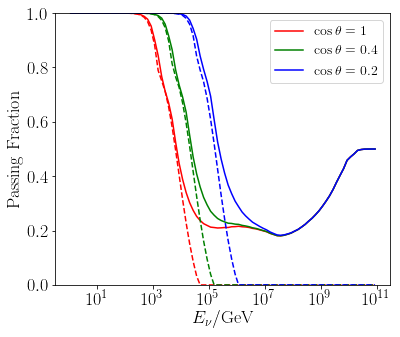

In [17]:
plt.figure(figsize=(6,5))

plt.plot(caca.mceq_run.e_grid,GetPassingFraction(1.0), label = r"$\cos\theta=1$", color = "red")
plt.plot(caca.mceq_run.e_grid,GetPassingFraction(0.4), label = r"$\cos\theta=0.4$", color = "green")
plt.plot(caca.mceq_run.e_grid,GetPassingFraction(0.2), label = r"$\cos\theta=0.2$", color = "blue")

plt.plot(caca.mceq_run.e_grid,
         [selfveto.correlated_passing_rate(enu,selfveto.minimum_muon_energy(selfveto.overburden(1.)),1.)
          for enu in e_grid], ls = "dashed", color = "red")
plt.plot(caca.mceq_run.e_grid,
         [selfveto.correlated_passing_rate(enu,selfveto.minimum_muon_energy(selfveto.overburden(0.4)),0.4)
          for enu in e_grid], ls = "dashed", color = "green")
plt.plot(caca.mceq_run.e_grid,
         [selfveto.correlated_passing_rate(enu,selfveto.minimum_muon_energy(selfveto.overburden(0.2)),0.2)
          for enu in e_grid], ls = "dashed", color = "blue")

plt.semilogx()
plt.ylim(0.,1.)
plt.legend(loc="upper right", fontsize=14)
plt.xlabel(r"$E_\nu/{\rm GeV}$")
plt.ylabel(r"${\rm Passing\ Fraction}$")
#plt.xlim(1e1,1e7)
         
#plt.plot(caca.mceq_run.e_grid,np.ones(len(caca.mceq_run.e_grid))/2.,"*")